# **Singapore flat resale**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import math
import numpy as np
from scipy.stats import norm, skew
import pickle

In [3]:
flat=pd.read_csv('/content/singapore_flat.csv')
flat.head(1)

<ipython-input-3-008984ef5114>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  flat=pd.read_csv('/content/singapore_flat.csv')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN


In [86]:
flat.shape

(932372, 11)

In [ ]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932372 entries, 0 to 932371
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                932372 non-null  object 
 1   town                 932372 non-null  object 
 2   flat_type            932372 non-null  object 
 3   block                932372 non-null  object 
 4   street_name          932372 non-null  object 
 5   storey_range         932372 non-null  object 
 6   floor_area_sqm       932372 non-null  float64
 7   flat_model           932372 non-null  object 
 8   lease_commence_date  932372 non-null  int64  
 9   resale_price         932372 non-null  float64
 10  remaining_lease      223322 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.2+ MB


In [ ]:
flat.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [4]:
# dropping remaining lease column as it has huge null value
flat.drop('remaining_lease', axis=1, inplace=True)

In [ ]:
flat.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [5]:
flat.duplicated().sum()

1972

In [6]:
#dropping the duplicated values
flat.drop_duplicates(keep='first', inplace=True)

In [7]:
flat.shape

(930400, 10)

In [ ]:
flat.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [8]:
# splitting month and year
flat['year']= flat['month'].apply(lambda i: int(i.split('-')[0]))
flat['month']= flat['month'].apply(lambda i: int(i.split('-')[1]))

In [ ]:
flat.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [9]:
# calculating age of the flat as assuming 'lease commence date' is the built year
flat['flat_age'] = flat['lease_commence_date'].apply( lambda i: int(2024-i))

In [ ]:
flat.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,flat_age
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,47
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,47
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,47
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,47
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,48


In [10]:
flat['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [11]:
flat['flat_type'] = flat['flat_type'].apply(lambda i: 'MULTI GENERATION' if i == 'MULTI-GENERATION' else i)

In [12]:
flat['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [13]:
flat['block'].unique()

array(['309', '216', '211', ..., '240A', '460D', '83A'], dtype=object)

In [14]:
flat['storey_range_end'] = flat['storey_range'].apply(lambda i : int(i.split(' TO')[1]))
flat['storey_range']= flat['storey_range'].apply(lambda i : int(i.split(' TO')[0]))


In [15]:
flat['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [16]:
flat['flat_model']= flat['flat_model'].apply(lambda i: i.title())

In [17]:
flat['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-Room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined Flat', 'Premium Maisonette',
       'Model A2', 'Type S1', 'Type S2', 'Dbss', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [18]:
cat = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

In [19]:
# converting category columns to numeric
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in cat:
  flat[i] = encode.fit_transform(flat[i])
flat.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,flat_age,storey_range_end
0,1,0,0,830,13,10,31.0,5,1977,9000.0,1990,47,12


In [ ]:
# try pow, log, expo to find the relation of floor_area_sqm column
#flat['floor_area_sqm'] = flat['floor_area_sqm'].apply(lambda i : math.log(i))
#flat['floor_area_sqm'] = flat['floor_area_sqm'].apply(lambda i : pow(i,3))
#flat['floor_area_sqm'] = flat['floor_area_sqm'].apply(lambda i : np.exp(i))

In [ ]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930400 entries, 0 to 932371
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930400 non-null  int64  
 1   town                 930400 non-null  float64
 2   flat_type            930400 non-null  float64
 3   block                930400 non-null  float64
 4   street_name          930400 non-null  float64
 5   storey_range         930400 non-null  int64  
 6   floor_area_sqm       930400 non-null  float64
 7   flat_model           930400 non-null  float64
 8   lease_commence_date  930400 non-null  int64  
 9   resale_price         930400 non-null  float64
 10  year                 930400 non-null  int64  
 11  flat_age             930400 non-null  int64  
 12  storey_range_end     930400 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 99.4 MB


In [ ]:
# statistical analysis and skewness of the data

In [20]:
continuous = ['floor_area_sqm', 'resale_price', 'year', 'flat_age']
category=['month','town', 'flat_type', 'block', 'street_name', 'flat_model', 'storey_range' 'storey_range_to', 'lease_commence_date']

In [37]:
for i in continuous:
  print(f'skewness of {i} = {skew(flat[i])}')

skewness of floor_area_sqm = 0.3665551099336138
skewness of resale_price = 0.9548300954704
skewness of year = 0.2929200879406222
skewness of flat_age = -0.653078435629467


In [38]:
def chart(column):
  plt.figure(figsize=(10, 4))
  plt.subplot(1,2,1)
  sns.histplot(data= flat,x=column,kde=True,bins=30,color='red')

  plt.subplot(1,2,2)
  sns.boxplot(flat[column])
  plt.show

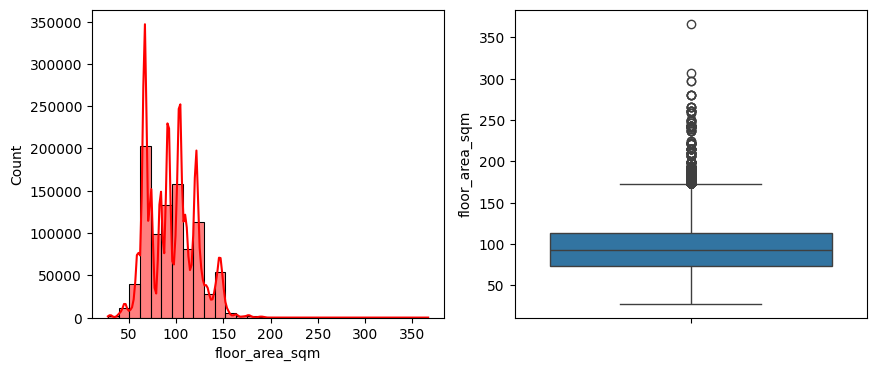

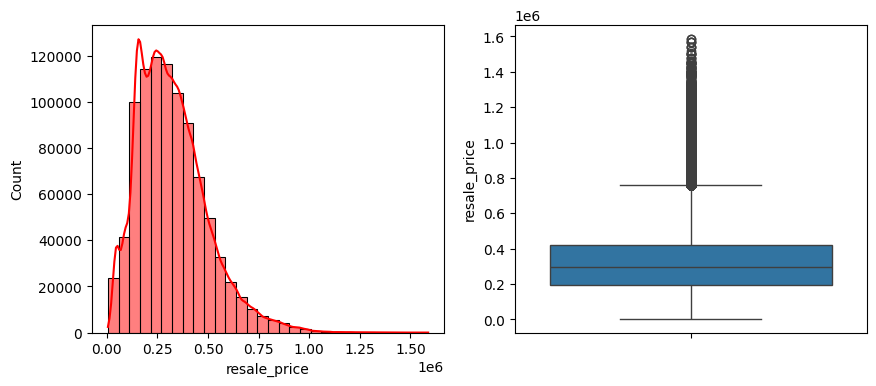

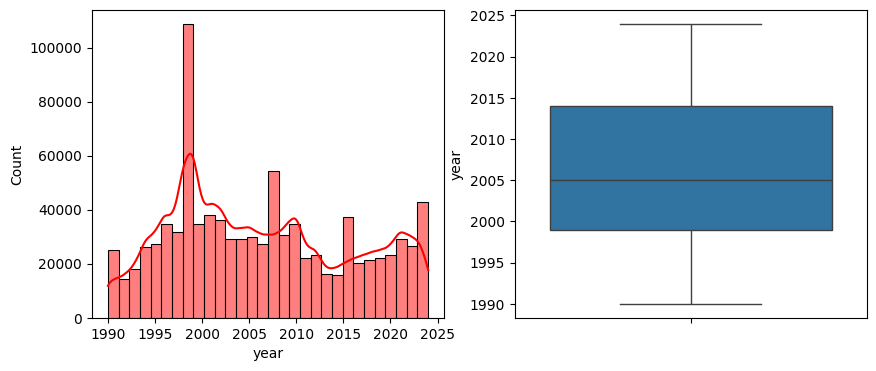

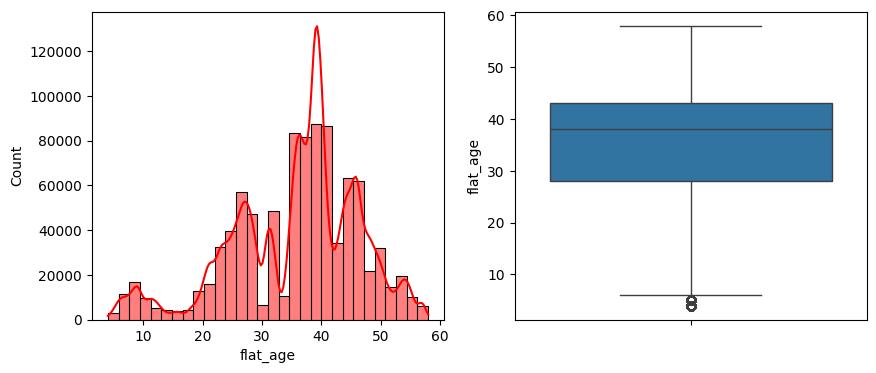

In [39]:
for i in continuous:
  chart(i)

In [40]:
# function to remove outliers using the IQR method
def outliers(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df=df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df

In [41]:
flat.shape

(930400, 13)

In [42]:
for col in continuous:
    df=outliers(flat,col)

In [43]:
flat.shape

(930400, 13)

In [44]:
# correlation btw columns
flat.corr()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,flat_age,storey_range_end
month,1.000000,0.003037,0.003405,0.002207,0.000982,-0.001838,0.002852,-0.002932,0.003544,0.004456,-0.025327,-0.003544,-0.004122
town,0.003037,1.000000,0.136673,0.086010,0.746763,-0.048640,0.132402,-0.117118,0.213010,0.057379,0.072128,-0.213010,-0.048477
flat_type,0.003405,0.136673,1.000000,0.079811,0.115184,0.077218,0.952785,-0.369020,0.405198,0.584173,0.100193,-0.405198,0.077529
block,0.002207,0.086010,0.079811,1.000000,0.133537,-0.005026,0.082771,-0.012639,0.147737,0.040178,0.050605,-0.147737,-0.004946
street_name,0.000982,0.746763,0.115184,0.133537,1.000000,-0.062299,0.128701,-0.107624,0.152000,0.031126,0.019561,-0.152000,-0.062223
storey_range,-0.001838,-0.048640,0.077218,-0.005026,-0.062299,1.000000,0.041964,-0.076672,0.173351,0.248191,0.108682,-0.173351,0.999375
floor_area_sqm,0.002852,0.132402,0.952785,0.082771,0.128701,0.041964,1.000000,-0.408437,0.381424,0.557671,0.061513,-0.381424,0.042137
flat_model,-0.002932,-0.117118,-0.369020,-0.012639,-0.107624,-0.076672,-0.408437,1.000000,-0.202375,-0.257966,-0.063473,0.202375,-0.076657
lease_commence_date,0.003544,0.213010,0.405198,0.147737,0.152000,0.173351,0.381424,-0.202375,1.000000,0.539577,0.433284,-1.000000,0.173724
resale_price,0.004456,0.057379,0.584173,0.040178,0.031126,0.248191,0.557671,-0.257966,0.539577,1.000000,0.677964,-0.539577,0.250533


<Axes: >

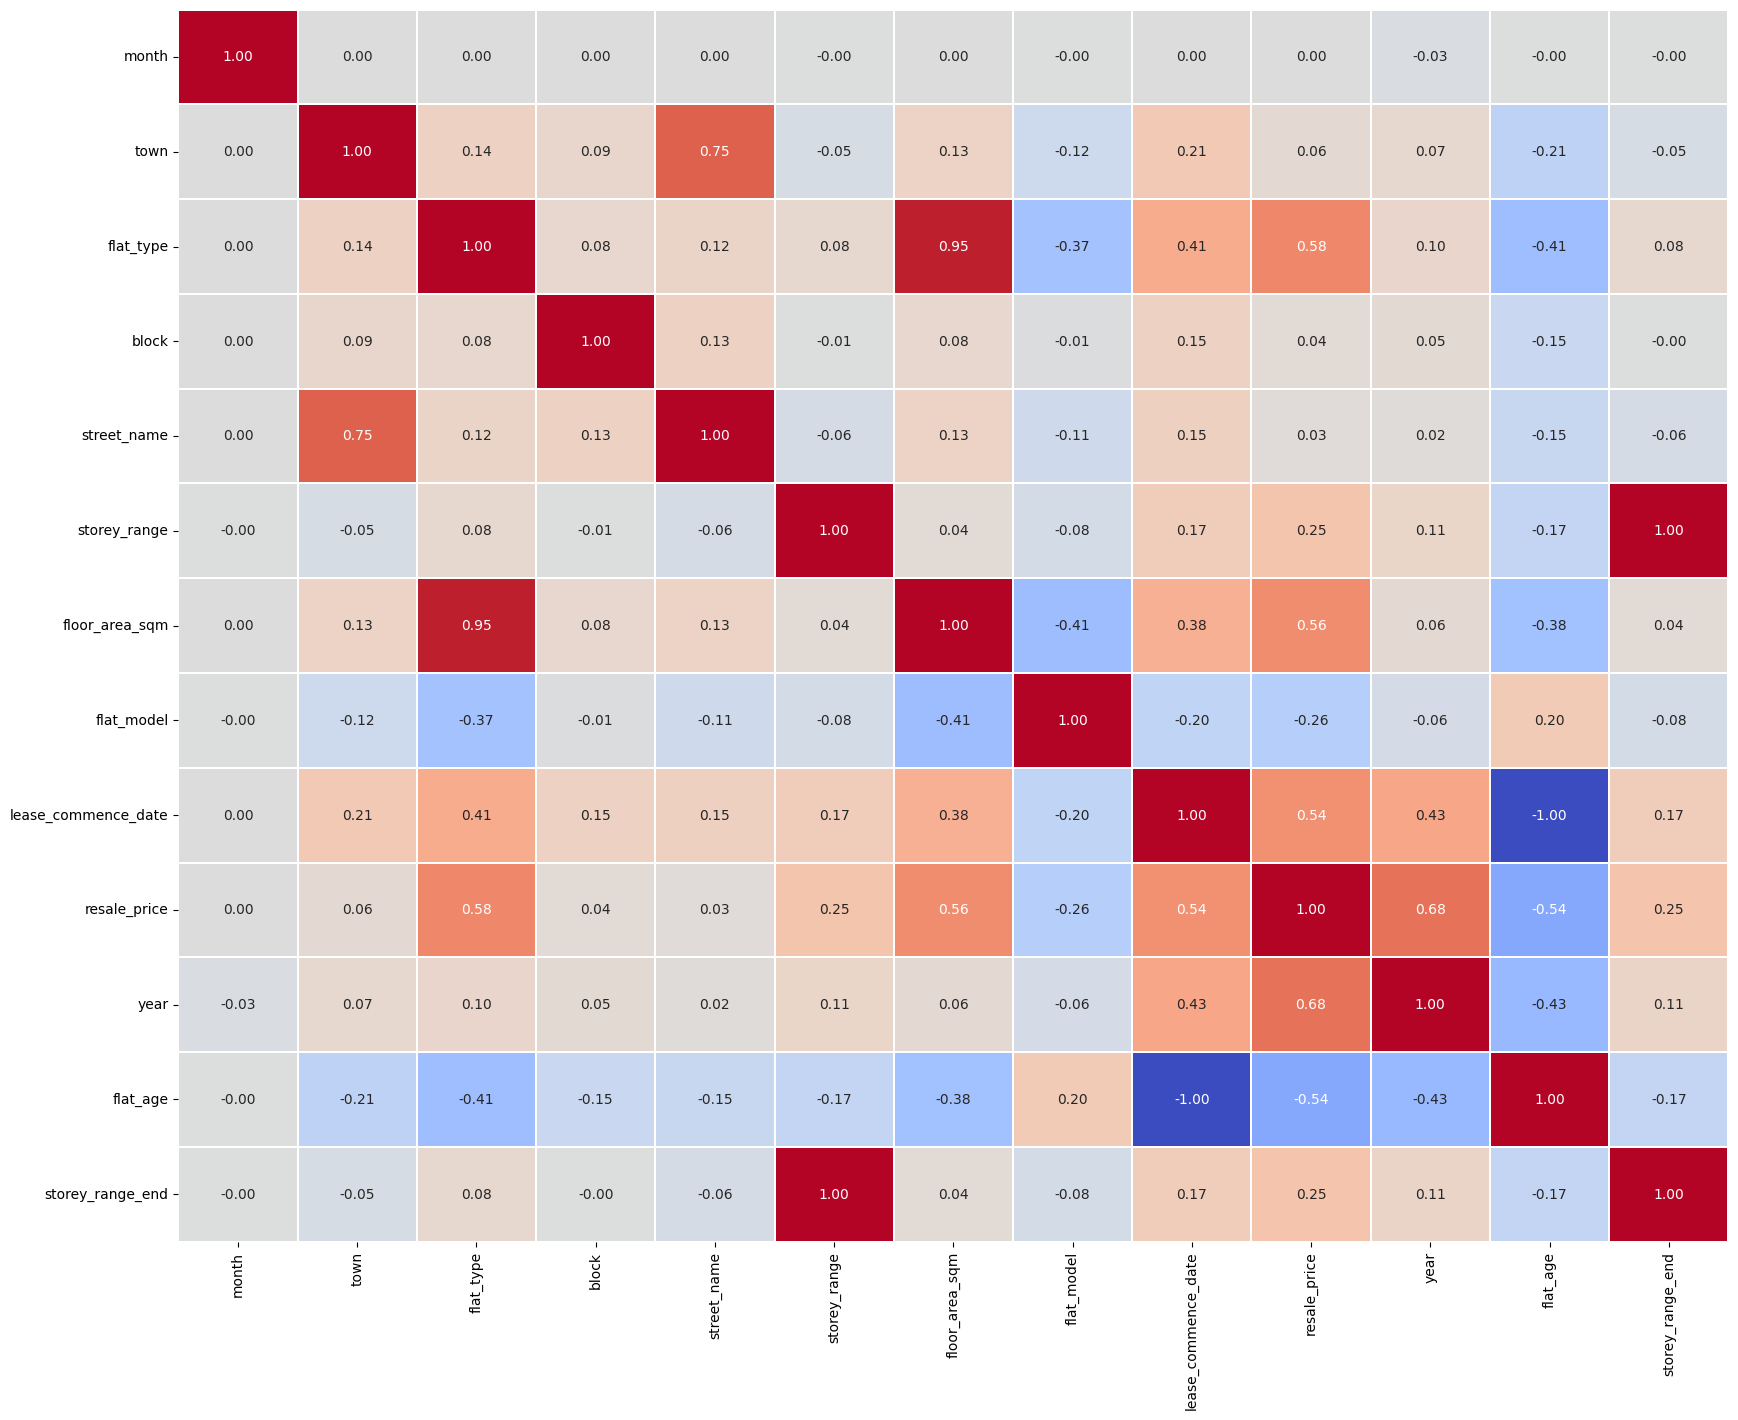

In [45]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(flat.corr(),linewidths=0.2,annot=True,cbar=False,fmt='.2f',cmap='coolwarm')

In [21]:
# dropping month column, as it have less impact
flat.drop('month', axis=1, inplace=True)

In [22]:
# independent and dependent value
x = flat.drop("resale_price", axis=1)
y = flat['resale_price']

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# models = [('AdaBoostRegressor', AdaBoostRegressor()),
#                      ('RandomForestRegressor', RandomForestRegressor()),
#                      #('ExtraTreesRegressor', ExtraTreesRegressor()),
#                      #('GradientBoostingRegressor', GradientBoostingRegressor()),
#                      #('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
#                      #('DecisionTreeRegressor', DecisionTreeRegressor()),
#                      #('XGBRegressor', XGBRegressor()),
#                      #('LinearRegression', LinearRegression()),
#                      #('KNeighborsRegressor', KNeighborsRegressor()),
#                      #('MLPRegressor', MLPRegressor()),
#                      ]

In [50]:
res=[]
def model_check(name, model):
  model= model.fit(x_train, y_train)
  y_predict= model.predict(x_test)

  data ={'Model_Name': name,
         'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
         'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
         'R2_Score': round(r2_score(y_test, y_predict), 4)}

  res.append(data)





model_check('XGB Regressor', XGBRegressor())


In [ ]:
model_check('AdaBoost Regressor', AdaBoostRegressor())

In [ ]:
model_check('RandomForestRegressor', RandomForestRegressor())

In [ ]:
model_check('ExtraTreesRegressor', ExtraTreesRegressor())

In [ ]:
model_check('GradientBoostingRegressor', GradientBoostingRegressor())

In [ ]:
model_check('HistGradientBoostingRegressor', HistGradientBoostingRegressor())

In [ ]:
model_check('DecisionTreeRegressor', DecisionTreeRegressor())

In [ ]:
model_check('LinearRegression', LinearRegression())

In [ ]:
model_check('KNeighborsRegressor', KNeighborsRegressor())

In [ ]:
model_check('MLPRegressor', MLPRegressor())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
score = pd.DataFrame(res)
score

,Model_Name,Mean_Absolute_Error,Mean_Square_Error,R2_Score
0,XGB Regressor,19186.6595,7.202149e+08,0.9757
1,AdaBoost Regressor,98030.0409,1.249659e+10,0.5783
2,RandomForestRegressor,17106.7154,6.161749e+08,0.9792
3,ExtraTreesRegressor,18661.9466,7.277545e+08,0.9754
4,GradientBoostingRegressor,34573.4714,2.669770e+09,0.9099
5,HistGradientBoostingRegressor,23149.5054,1.075032e+09,0.9637
6,DecisionTreeRegressor,21053.3586,9.851407e+08,0.9668
7,LinearRegression,61778.6160,7.029269e+09,0.7628
8,KNeighborsRegressor,31434.8853,2.041971e+09,0.9311
9,MLPRegressor,57891.8247,6.297859e+09,0.7875


In [ ]:
#xgb, extratree, randomforest

#xgb

model= XGBRegressor(learning_rate = 0.5, max_depth = 5, n_estimators = 250).fit(x_train, y_train)
y_predict= model.predict(x_test)

data ={'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
        'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
        'R2_Score': round(r2_score(y_test, y_predict), 4)}

data

{'Mean_Absolute_Error': 17821.0698,
 'Mean_Square_Error': 612922993.991,
 'R2_Score': 0.9793}

In [ ]:
#extratree

model= ExtraTreesRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42).fit(x_train, y_train)
y_predict= model.predict(x_test)

data ={'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
        'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
        'R2_Score': round(r2_score(y_test, y_predict), 4)}

data

{'Mean_Absolute_Error': 17527.6226,
 'Mean_Square_Error': 689888526.0709,
 'R2_Score': 0.9767}

In [25]:
#randomforest

model_RF= RandomForestRegressor().fit(x_train, y_train)
y_predict= model_RF.predict(x_test)

data ={'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
        'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
        'R2_Score': round(r2_score(y_test, y_predict), 4)}

data

{'Mean_Absolute_Error': 16990.7367,
 'Mean_Square_Error': 602295035.8839,
 'R2_Score': 0.9796}

In [27]:
pickle.dump(model_RF, open('Singapore_flat_resale_model', 'wb'))